<a href="https://colab.research.google.com/github/G-Gaddu/Quant-Material/blob/main/Grid_Trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
# Import the necessary packages
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import yfinance as yf
import matplotlib.pyplot as plt

In [94]:
# Define the list of cryptocurrencies
cryptocurrencies = ['BTC-USD', 'ETH-USD', 'USDT-USD', 'BNB-USD', 'USDC-USD', 'XRP-USD', 'BUSD-USD', 'ADA-USD', 'DOGE-USD', 'MATIC-USD', 'SOL-USD', 'DOT-USD', 'WTRX-USD', 'LTC-USD', 'SHIB-USD', 'TRX-USD', 'AVAX-USD', 'DAI-USD', 'UNI7083-USD', 'LEO-USD']

# Define the start and end dates
end_date = datetime.now()
start_date = end_date - timedelta(days=180)

# Create an empty dictionary to store the data
data = {}

# Loop through the list of cryptocurrencies and download the data
for cryptocurrency in cryptocurrencies:
  data[cryptocurrency] = yf.download(cryptocurrency, start=start_date, end=end_date)

# Print the data
for cryptocurrency in cryptocurrencies:
  print(data[cryptocurrency])


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

                    Open          High           Low         Close  \
Date                                                                 
2024-02-25  51565.214844  51950.027344  51306.171875  51733.238281   
2024-02-26  51730.539062  54938.175781  50931.031250  54522.402344   
2024-02-27  54519.363281  57537.839844  54484.199219  57085.371094   
2024-02-28  57071.097656  63913.132812  56738.425781  62504.789062   
2024-02-29  62499.183594  63585.644531  60498.730469  61198.382812   
...                  ...           ...           ...           ...   
2024-08-19  58480.710938  59612.660156  57864.710938  59493.453125   
2024-08-20  59493.453125  61396.328125  58610.882812  59012.792969   
2024-08-21  59014.988281  61834.351562  58823.445312  61175.191406   
2024-08-22  61168.316406  61408.109375  59815.253906  60381.914062   
2024-08-23  60385.074219  63797.683594  60385.074219  63776.234375   

               Adj Close       Volume  
Date                                   
2024-02-2

<ipython-input-95-94c538d47362>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[cryptocurrency].fillna(method='ffill', inplace=True)


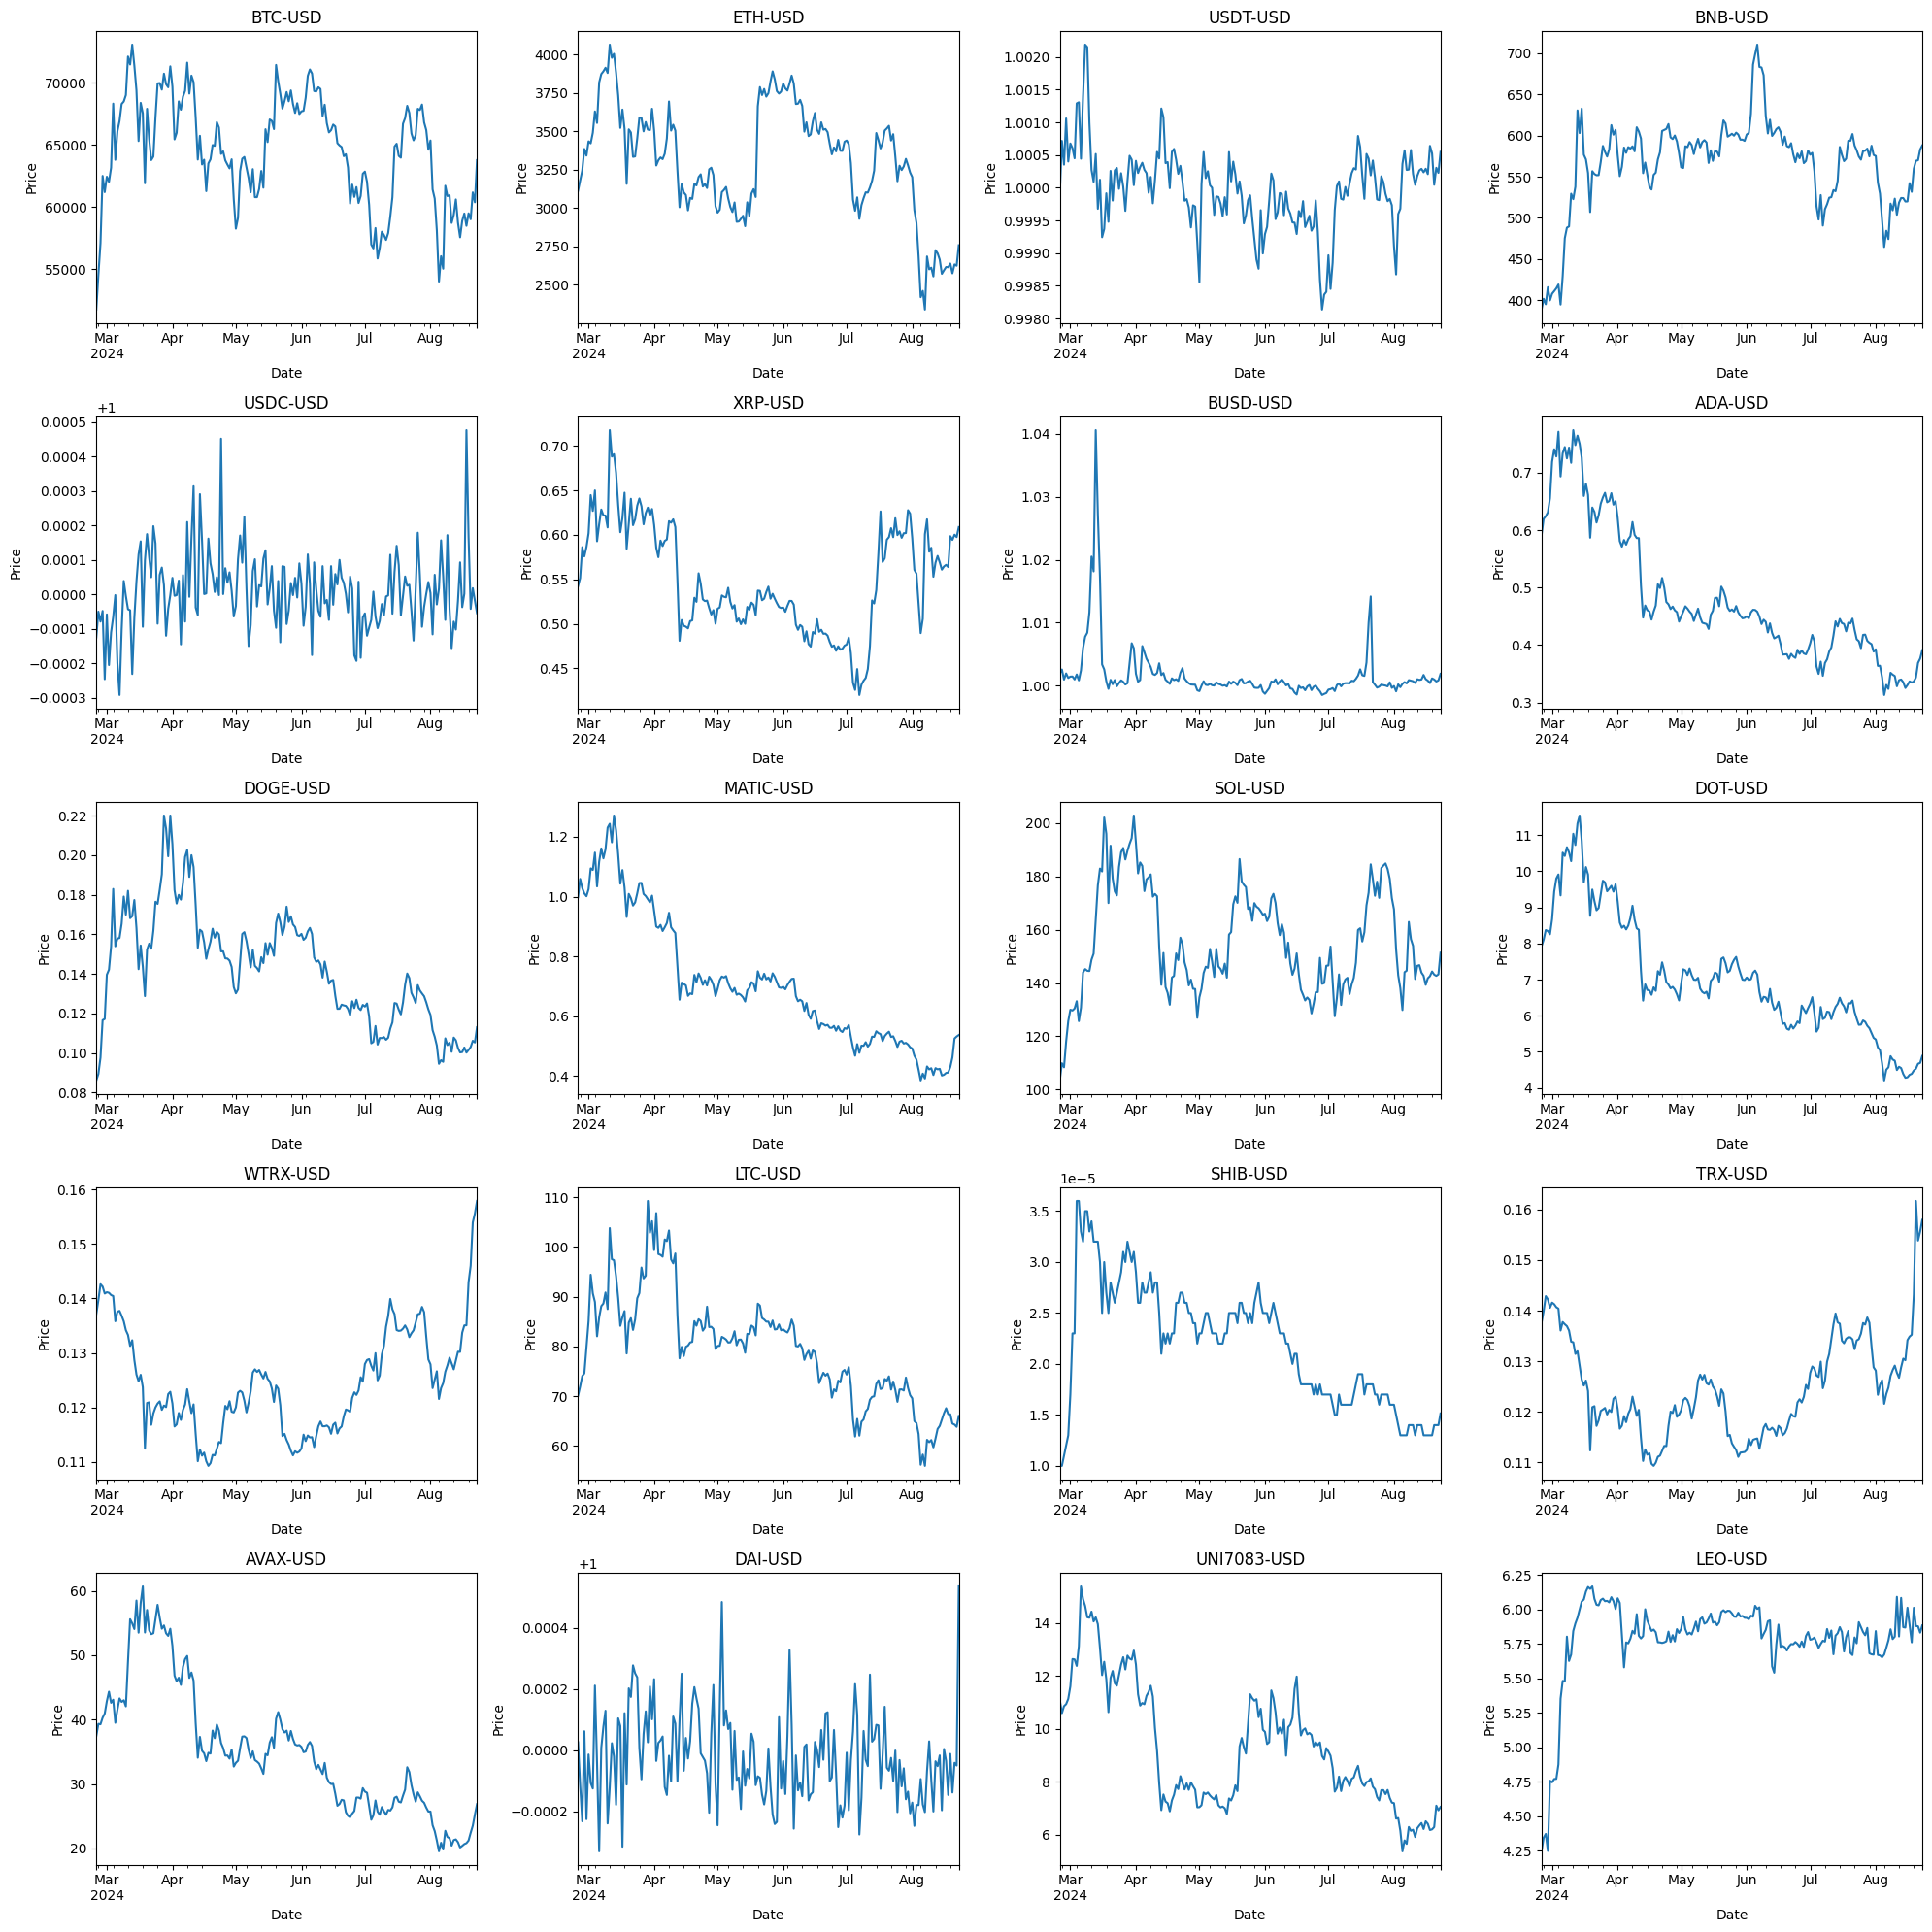

In [95]:
# Forward fill any NaNs
for cryptocurrency in cryptocurrencies:
  data[cryptocurrency].fillna(method='ffill', inplace=True)

# Plot the prices for each cryptocurrency on a set of subplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
axes = axes.flatten()

for i, cryptocurrency in enumerate(cryptocurrencies):
  ax = axes[i]
  data[cryptocurrency]['Close'].plot(ax=ax)
  ax.set_title(cryptocurrency)
  ax.set_xlabel('Date')
  ax.set_ylabel('Price')

plt.tight_layout()
plt.show()


In [96]:
# Define the grid trading parameters
grid_levels = 10
grid_width = 0.1  # 10%

# Create a dictionary to store the trading signals
signals = {}

# Loop through the cryptocurrencies and generate trading signals
for cryptocurrency in cryptocurrencies:
  # Calculate the upper and lower bounds of the grid
  upper_bound = data[cryptocurrency]['Close'].max()
  lower_bound = data[cryptocurrency]['Close'].min()

  # Calculate the grid levels
  grid = np.linspace(lower_bound, upper_bound, grid_levels)

  # Create a list to store the signals
  signals[cryptocurrency] = []

  # Loop through the data and generate signals
  for i in range(len(data[cryptocurrency])):
    price = data[cryptocurrency]['Close'][i]

    # Check if the price is above the upper bound
    if price > grid[-1]:
      signals[cryptocurrency].append('Sell')

    # Check if the price is below the lower bound
    elif price < grid[0]:
      signals[cryptocurrency].append('Buy')

    # Check if the price crosses a grid level
    else:
      for j in range(len(grid) - 1):
        if price > grid[j] and price < grid[j + 1]:
          if data[cryptocurrency]['Close'][i - 1] < grid[j]:
            signals[cryptocurrency].append('Buy')
          elif data[cryptocurrency]['Close'][i - 1] > grid[j + 1]:
            signals[cryptocurrency].append('Sell')
          else:
            signals[cryptocurrency].append('Hold')
          break

# Print the signals
for cryptocurrency in cryptocurrencies:
  print(f'Signals for {cryptocurrency}: {signals[cryptocurrency]}')


<ipython-input-96-8efed111c551>:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  price = data[cryptocurrency]['Close'][i]
<ipython-input-96-8efed111c551>:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data[cryptocurrency]['Close'][i - 1] < grid[j]:
<ipython-input-96-8efed111c551>:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif data[cryptocurrency]['Close'][i - 1] > grid[j + 1]:


Signals for BTC-USD: ['Buy', 'Buy', 'Buy', 'Sell', 'Buy', 'Hold', 'Hold', 'Buy', 'Sell', 'Buy', 'Hold', 'Hold', 'Buy', 'Hold', 'Buy', 'Hold', 'Hold', 'Sell', 'Sell', 'Buy', 'Sell', 'Sell', 'Buy', 'Sell', 'Hold', 'Hold', 'Buy', 'Buy', 'Hold', 'Hold', 'Buy', 'Sell', 'Hold', 'Buy', 'Sell', 'Sell', 'Buy', 'Buy', 'Sell', 'Buy', 'Hold', 'Buy', 'Sell', 'Hold', 'Hold', 'Sell', 'Sell', 'Hold', 'Sell', 'Buy', 'Sell', 'Hold', 'Buy', 'Hold', 'Hold', 'Buy', 'Hold', 'Sell', 'Hold', 'Hold', 'Sell', 'Hold', 'Buy', 'Sell', 'Sell', 'Buy', 'Buy', 'Buy', 'Hold', 'Sell', 'Hold', 'Sell', 'Buy', 'Sell', 'Hold', 'Buy', 'Hold', 'Hold', 'Buy', 'Sell', 'Buy', 'Hold', 'Hold', 'Buy', 'Sell', 'Hold', 'Sell', 'Buy', 'Hold', 'Hold', 'Hold', 'Sell', 'Hold', 'Buy', 'Sell', 'Hold', 'Hold', 'Buy', 'Hold', 'Buy', 'Hold', 'Sell', 'Hold', 'Hold', 'Hold', 'Sell', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Sell', 'Hold', 'Hold', 'Hold', 'Hold', 'Sell', 'Sell', 'Buy', 'Sell', 'Buy', 'Sell', 'Hold', 'Buy', 'Hold', 'Hold',

In [108]:
# Create a dictionary to store the profitability metrics
profitability = {}

# Loop through the cryptocurrencies and calculate the profitability metrics
for cryptocurrency in cryptocurrencies:
  # Initialize the variables
  profit = 0
  trades = 0
  buy_price = 0
  sell_price = 0

  # Create a list to store the daily returns
  daily_returns = []

  # Loop through the signals and calculate the profit
  for i in range(len(signals[cryptocurrency])):
    if signals[cryptocurrency][i] == 'Buy':
      buy_price = data[cryptocurrency]['Close'][i]
      trades += 1
    elif signals[cryptocurrency][i] == 'Sell' and buy_price != 0:
      sell_price = data[cryptocurrency]['Close'][i]
      profit += sell_price - buy_price
      buy_price = 0
      trades += 1

    # Calculate the daily return
    if i > 0:
      daily_return = (data[cryptocurrency]['Close'][i] - data[cryptocurrency]['Close'][i - 1]) / data[cryptocurrency]['Close'][i - 1]
      daily_returns.append(daily_return)

  # Calculate the profitability metrics
  profit_per_trade = profit / trades if trades > 0 else 0
  sharpe_ratio = np.mean(daily_returns) / np.std(daily_returns) if len(daily_returns) > 0 else 0

  # Calculate the drawdowns
  drawdowns = []
  peak = data[cryptocurrency]['Close'][0]
  for i in range(len(data[cryptocurrency])):
    price = data[cryptocurrency]['Close'][i]
    if price > peak:
      peak = price
    drawdown = (peak - price) / peak
    drawdowns.append(drawdown)

  # Calculate the maximum drawdown
  max_drawdown = max(drawdowns)

  # Calculate the Calmar ratio
  calmar_ratio = np.mean(daily_returns) / max_drawdown if max_drawdown != 0 else 0

  # Calculate the Sortino ratio
  negative_returns = [r for r in daily_returns if r < 0]
  sortino_ratio = np.mean(daily_returns) / np.std(negative_returns) if len(negative_returns) > 0 else 0

  # Store the profitability metrics
  profitability[cryptocurrency] = {
      'profit': profit,
      'trades': trades,
      'profit_per_trade': profit_per_trade,
      'sharpe_ratio': sharpe_ratio,
      'calmar_ratio': calmar_ratio,
      'sortino_ratio': sortino_ratio,
      'drawdowns': drawdowns
  }

# Print the profitability metrics
for cryptocurrency in cryptocurrencies:
  print(f'Profitability metrics for {cryptocurrency}: {profitability[cryptocurrency]}')


<ipython-input-108-e2aaf5e5dd62>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  buy_price = data[cryptocurrency]['Close'][i]
<ipython-input-108-e2aaf5e5dd62>:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  daily_return = (data[cryptocurrency]['Close'][i] - data[cryptocurrency]['Close'][i - 1]) / data[cryptocurrency]['Close'][i - 1]
<ipython-input-108-e2aaf5e5dd62>:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sell_price = d

Profitability metrics for BTC-USD: {'profit': 8609.80859375, 'trades': 75, 'profit_per_trade': 114.79744791666667, 'sharpe_ratio': 0.045755162828782094, 'calmar_ratio': 0.0054179510238387685, 'sortino_ratio': 0.07960399021733822, 'drawdowns': [0.0, 0.0, 0.0, 0.0, 0.020900898468654838, 0.0010264213504640207, 0.007598480266449583, 0.0, 0.0, 0.066284024557604, 0.03254201522862314, 0.020560825026099627, 0.0004437308468856463, 0.0, 0.0, 0.0, 0.008909905479502505, 0.0, 0.023081902891897623, 0.0503496214945918, 0.1062946193395226, 0.06421251034775291, 0.07573400630785335, 0.15284881761957214, 0.07073864996887122, 0.10388267358569307, 0.12731653904438076, 0.12343821621843508, 0.0800362342389185, 0.042755033625921035, 0.042357906538411545, 0.049643985988629444, 0.03199828791724534, 0.04365789644721449, 0.0470447544589408, 0.023943182284647015, 0.04626696261810121, 0.10449044372190713, 0.09718592431944283, 0.06259492566721626, 0.07177898397039004, 0.057295978230380316, 0.050913616787647005, 0.01

In [114]:
# Evaluate the market impact of the strategy on each cryptocurrency
for cryptocurrency in cryptocurrencies:
  print(f"Market impact for {cryptocurrency}:")

  # Calculate the total volume traded
  total_volume = 0
  for i in range(len(signals[cryptocurrency])):
    if signals[cryptocurrency][i] == 'Buy' or signals[cryptocurrency][i] == 'Sell':
      total_volume += data[cryptocurrency]['Volume'][i]

  # Calculate the average daily volume
  avg_daily_volume = np.mean(data[cryptocurrency]['Volume'])

  # Calculate the percentage of volume traded by the strategy
  volume_percentage = (total_volume / avg_daily_volume) * 100

  print(f"  Total volume traded: {total_volume}")
  print(f"  Average daily volume: {avg_daily_volume}")
  print(f"  Percentage of volume traded: {volume_percentage:.2f}%")

  # Analyze the price impact of trades
  buy_impact = []
  sell_impact = []
  for i in range(len(signals[cryptocurrency])):
    if signals[cryptocurrency][i] == 'Buy':
      price_change = data[cryptocurrency]['Close'][i] - data[cryptocurrency]['Open'][i]
      buy_impact.append(price_change / data[cryptocurrency]['Open'][i])
    elif signals[cryptocurrency][i] == 'Sell':
      price_change = data[cryptocurrency]['Open'][i] - data[cryptocurrency]['Close'][i]
      sell_impact.append(price_change / data[cryptocurrency]['Open'][i])

  avg_buy_impact = np.mean(buy_impact) if buy_impact else 0
  avg_sell_impact = np.mean(sell_impact) if sell_impact else 0

  print(f"  Average buy impact: {avg_buy_impact:.4f}")
  print(f"  Average sell impact: {avg_sell_impact:.4f}")

  print("\n")


Market impact for BTC-USD:
  Total volume traded: 3309805927393
  Average daily volume: 33583979057.950275
  Percentage of volume traded: 9855.31%
  Average buy impact: -0.0011
  Average sell impact: 0.0035


Market impact for ETH-USD:
  Total volume traded: 999521784988
  Average daily volume: 17043934739.734806
  Percentage of volume traded: 5864.38%
  Average buy impact: 0.0128
  Average sell impact: 0.0119


Market impact for USDT-USD:
  Total volume traded: 6943825947015
  Average daily volume: 64839804955.01105
  Percentage of volume traded: 10709.20%
  Average buy impact: -0.0000
  Average sell impact: -0.0001


Market impact for BNB-USD:
  Total volume traded: 131002144467
  Average daily volume: 1994030786.8563535
  Percentage of volume traded: 6569.72%
  Average buy impact: 0.0028
  Average sell impact: 0.0009


Market impact for USDC-USD:
  Total volume traded: 961376775320
  Average daily volume: 7067027802.016575
  Percentage of volume traded: 13603.69%
  Average buy impac

<ipython-input-114-9de2103fb6b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_volume += data[cryptocurrency]['Volume'][i]
<ipython-input-114-9de2103fb6b1>:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  price_change = data[cryptocurrency]['Close'][i] - data[cryptocurrency]['Open'][i]
<ipython-input-114-9de2103fb6b1>:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  buy_impact.append(price_change / data[cryptocurrency]['O

In [120]:
# Evaluate the response to liquidity shocks
for cryptocurrency in cryptocurrencies:
  print(f"Liquidity shock analysis for {cryptocurrency}:")

  # Identify liquidity shocks (e.g., large volume spikes)
  volume_shocks = []
  for i in range(len(data[cryptocurrency])):
    if data[cryptocurrency]['Volume'][i] > 2 * np.mean(data[cryptocurrency]['Volume']):
      volume_shocks.append(i)

  # Analyze price behavior around liquidity shocks
  price_impact = []
  for shock in volume_shocks:
    price_before = data[cryptocurrency]['Close'][shock - 1]
    price_after = data[cryptocurrency]['Close'][shock + 1]
    impact = (price_after - price_before) / price_before
    price_impact.append(impact)

  avg_price_impact = np.mean(price_impact) if price_impact else 0

  print(f"  Number of liquidity shocks: {len(volume_shocks)}")
  print(f"  Average price impact during shocks: {avg_price_impact:.4f}")

  # Analyze strategy performance during shocks
  shock_returns = []
  for shock in volume_shocks:
    if shock > 0 and shock < len(data[cryptocurrency]) - 1:
      daily_return = (data[cryptocurrency]['Close'][shock + 1] - data[cryptocurrency]['Close'][shock - 1]) / data[cryptocurrency]['Close'][shock - 1]
      shock_returns.append(daily_return)

  avg_shock_return = np.mean(shock_returns) if shock_returns else 0

  print(f"  Average strategy return during shocks: {avg_shock_return:.4f}")

  print("\n")


Liquidity shock analysis for BTC-USD:
  Number of liquidity shocks: 7
  Average price impact during shocks: -0.0024
  Average strategy return during shocks: -0.0024


Liquidity shock analysis for ETH-USD:
  Number of liquidity shocks: 7
  Average price impact during shocks: 0.0256
  Average strategy return during shocks: 0.0256


Liquidity shock analysis for USDT-USD:
  Number of liquidity shocks: 4
  Average price impact during shocks: -0.0000
  Average strategy return during shocks: -0.0000


Liquidity shock analysis for BNB-USD:
  Number of liquidity shocks: 7
  Average price impact during shocks: 0.0476
  Average strategy return during shocks: 0.0476


Liquidity shock analysis for USDC-USD:
  Number of liquidity shocks: 3
  Average price impact during shocks: 0.0001
  Average strategy return during shocks: 0.0001


Liquidity shock analysis for XRP-USD:
  Number of liquidity shocks: 14
  Average price impact during shocks: 0.0008
  Average strategy return during shocks: 0.0008


Liq

<ipython-input-120-965a409b796b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data[cryptocurrency]['Volume'][i] > 2 * np.mean(data[cryptocurrency]['Volume']):
<ipython-input-120-965a409b796b>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  price_before = data[cryptocurrency]['Close'][shock - 1]
<ipython-input-120-965a409b796b>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  price_after = data[cryptocurrency]['Close'][sho

IndexError: index 181 is out of bounds for axis 0 with size 181